<a href="https://colab.research.google.com/github/Svar7769/DeepLearnig/blob/main/IntroToTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import tenserflow 2

import tensorflow as tf

#import pakage
!pip install mitdeeplearning 
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.1MB 2.7MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.1.2-cp36-none-any.whl size=2114585 sha256=8d11578b304c3d0bb2af60cb457cdd1bf91797fea0f82b0f6ab7369daae0bdb0
  Stored in directory: /root/.cache/pip/wheels/27/e1/73/5f01c787621d8a3c857f59876c79e304b9b64db9ff5bd61b74
Successfully built mitdeeplearning


In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [ ]:
sport = tf.constant(["Tennis","Basketball"], tf.string)
number = tf.constant([3.12,1.414,2.71], tf.float64)

print("`Sport` is a {}-d Tensor with shape: {}".format(tf.rank(sport).numpy(), tf.shape(sport)))
print("`number` is a {}-d Tensor with shape: {}".format(tf.rank(number).numpy(), tf.shape(number)))

`Sport` is a 1-d Tensor with shape: [2]
`number` is a 1-d Tensor with shape: [3]


In [ ]:
matrix = tf.constant([[1,2,3],[1,2,3]], tf.int32)

assert isinstance(matrix, tf.Tensor), "matrix must be a tensor object"
assert tf.rank(matrix).numpy() == 2 

print("{} and {}".format(tf.rank(matrix).numpy(), tf.shape(matrix)))

2 and [2 3]


In [ ]:
images = tf.zeros([10, 256, 256, 3])
assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"
print("{} and {}".format(tf.rank(images).numpy(), tf.shape(images)))

4 and [ 10 256 256   3]


In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [1 2 3]
`column_vector`: [3 3]
`scalar`: 3


In [ ]:
a = tf.constant(12)
b = tf.constant(545)

c1 = tf.add(a,b)
c2 = a + b

print(c1)
print(c2)

tf.Tensor(557, shape=(), dtype=int32)
tf.Tensor(557, shape=(), dtype=int32)


In [ ]:
def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  
  return e


In [ ]:

a, b = 1.5, 2.5
e = func(a,b)
print(e) 

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
# creating perceptron
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes


  def build(self, input_shape):
    d = int(input_shape[-1])
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) 
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

  def call(self, x):
    z = tf.matmul(x, self.W) + self.b
    y = tf.sigmoid(z)
    return y


tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#No output node
n_output_nodes = 3

model = Sequential()

#activation need no of output node and and activation function
dense_layer = Dense(n_output_nodes, activation = 'sigmoid')
model.add(dense_layer)

In [ ]:
x_input = tf.constant([[1,2.]], shape=(1,2))
model_output = model(x_input)
print(model_output)

tf.Tensor([[0.5607363  0.65668976 0.12496966]], shape=(1, 3), dtype=float32)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs):
    return self.dense_layer(inputs)

In [ ]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape = (1,2))

print(model.call(x_input))

tf.Tensor([[0.6504886  0.4782816  0.83736604]], shape=(1, 3), dtype=float32)


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs, isidentity=False):
    x = self.dense_layer(inputs)
    if isidentity: # TODO
      return inputs # TODO
    return x

In [ ]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)

print("Network output with activation: {}; network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Network output with activation: [[0.9139061 0.3266745 0.8392328]]; network identity output: [[1. 2.]]


In [ ]:
x = tf.Variable(3.)

#initiate gradient Tape
with tf.GradientTape() as tape:
  y = x * x

dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.

Initializing x=[[-2.1246104]]


Text(0, 0.5, 'x Value')

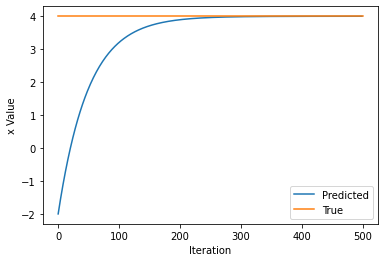

In [ ]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2
history = []

x_f = 4

for  i in range(500):
  with tf.GradientTape() as tape:
    loss = tf.square(x - x_f)

  grad = tape.gradient(loss, x)

  new_x =x - learning_rate * grad
  x.assign(new_x) #update value of x
  history.append(x.numpy()[0])

plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('Predicted','True'))
plt.xlabel('Iteration')
plt.ylabel('x Value')